# Proyecto Final: Construcción de un Clasificador de Predicción de Lluvia

Objetivos
Al completar este laboratorio serás capaz de:

Explorar y realizar ingeniería de características en un conjunto de datos del mundo real

Construir un pipeline de clasificación y optimizarlo usando búsqueda en cuadrícula con validación cruzada

Evaluar tu modelo interpretando varias métricas de rendimiento y visualizaciones

Implementar un clasificador diferente actualizando tu pipeline

Usar un conjunto apropiado de parámetros para buscar en cada caso

Instrucciones
Después de completar el Notebook:

Descarga el notebook usando Archivo > Descargar

Este notebook será calificado usando el AI grader en la sección posterior

Copia/Pega tus respuestas en markdown en la sección posterior AI Mark assignment

# Sobre el conjunto de datos

La fuente original de los datos es la Oficina de Meteorología del Gobierno de Australia (Australian Government's Bureau of Meteorology).
Los datos más recientes pueden obtenerse en:
[http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)

El conjunto de datos que usarás en este proyecto fue descargado de Kaggle:
[https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package?resource=download&select=weatherAUS.csv)

Las definiciones de las columnas fueron obtenidas de:
[http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)

El conjunto de datos contiene observaciones de métricas meteorológicas para cada día desde 2008 hasta 2017, e incluye los siguientes campos:

| Field         | Description                                           | Unit            | Type   |
| :------------ | :---------------------------------------------------- | :-------------- | :----- |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged over 10 minutes prior to 9am  | Compass Points  | object |
| WindDir3pm    | Wind direction averaged over 10 minutes prior to 3pm  | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged over 10 minutes prior to 9am      | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged over 10 minutes prior to 3pm      | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was at least 1mm of rain today               | Yes/No          | object |
| RainTomorrow  | If there is at least 1mm of rain tomorrow             | Yes/No          | object |

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

Ejecuta las siguientes celdas para cargar el conjunto de datos como un dataframe de pandas.

In [2]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/_0eYOqji3unP1tDNKWZMjg/weatherAUS-2.csv"
df = pd.read_csv(url)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.count()

Date             145460
Location         145460
MinTemp          143975
MaxTemp          144199
Rainfall         142199
Evaporation       82670
Sunshine          75625
WindGustDir      135134
WindGustSpeed    135197
WindDir9am       134894
WindDir3pm       141232
WindSpeed9am     143693
WindSpeed3pm     142398
Humidity9am      142806
Humidity3pm      140953
Pressure9am      130395
Pressure3pm      130432
Cloud9am          89572
Cloud3pm          86102
Temp9am          143693
Temp3pm          141851
RainToday        142199
RainTomorrow     142193
dtype: int64

Sunshine y cloud cover parecen características importantes, pero tienen muchísimos valores faltantes, demasiados como para imputarlos de manera confiable.

Eliminar todas las filas con valores faltantes

Para mantener las cosas simples, eliminaremos todas las filas que contienen valores faltantes y veremos qué queda.

In [4]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cloud3p

Dado que todavía tenemos 56,000 observaciones después de eliminar los valores faltantes, puede que no necesitemos imputar ningún valor faltante.
Veamos cómo nos va.

In [5]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Eliminar todas las filas con valores faltantes

Para mantener las cosas simples, eliminaremos todas las filas que contienen valores faltantes y veremos qué queda.

## Consideraciones sobre fuga de datos (Data Leakage)

Considera las descripciones anteriores de las columnas en el conjunto de datos.
¿Existen limitaciones prácticas para poder predecir si lloverá mañana usando los datos disponibles?

## Puntos a notar – 1

Enumera algunas de las características que serían ineficientes para predecir la lluvia de mañana.
Habrá una pregunta en el cuestionario que sigue basada en esta observación.

Si ajustamos nuestro enfoque y buscamos predecir la lluvia de hoy usando datos históricos del clima hasta e incluyendo ayer, entonces podemos utilizar legítimamente todas las características disponibles.
Este cambio sería especialmente útil para aplicaciones prácticas, como decidir si irás en bicicleta al trabajo hoy.

Con este nuevo objetivo, deberíamos actualizar los nombres de las columnas relacionadas con la lluvia para evitar confusiones.

In [6]:
df = df.rename(columns={'RainToday': 'RainYesterday',
                        'RainTomorrow': 'RainToday'
                        })

## Granularidad de los datos

¿Tendrían los patrones climáticos el mismo nivel de predictibilidad en ubicaciones muy diferentes dentro de Australia? Yo pensaría que no.
La probabilidad de lluvia en un lugar puede ser mucho más alta que en otro.
Usar todas las ubicaciones requiere un modelo más complejo, ya que tendría que adaptarse a los patrones climáticos locales.
Veamos cuántas observaciones tenemos para cada ubicación y evaluemos si podemos reducir nuestra atención a una región más pequeña.

## Selección de ubicaciones
Podrías investigar para agrupar las ciudades de la columna Location por distancia, lo cual ya hice por ti detrás de escena.
Descubrí que Watsonia está a solo 15 km de Melbourne, y el Aeropuerto de Melbourne está a solo 18 km de Melbourne.
Agrupemos estas tres ubicaciones y usemos únicamente sus datos meteorológicos para construir nuestro modelo de predicción localizado.
Como aún podría haber ligeras variaciones en los patrones climáticos, mantendremos Location como una variable categórica.

In [7]:
df = df[df.Location.isin(['Melbourne','MelbourneAirport','Watsonia',])]
df. info()

<class 'pandas.core.frame.DataFrame'>
Index: 7557 entries, 64191 to 80997
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           7557 non-null   object 
 1   Location       7557 non-null   object 
 2   MinTemp        7557 non-null   float64
 3   MaxTemp        7557 non-null   float64
 4   Rainfall       7557 non-null   float64
 5   Evaporation    7557 non-null   float64
 6   Sunshine       7557 non-null   float64
 7   WindGustDir    7557 non-null   object 
 8   WindGustSpeed  7557 non-null   float64
 9   WindDir9am     7557 non-null   object 
 10  WindDir3pm     7557 non-null   object 
 11  WindSpeed9am   7557 non-null   float64
 12  WindSpeed3pm   7557 non-null   float64
 13  Humidity9am    7557 non-null   float64
 14  Humidity3pm    7557 non-null   float64
 15  Pressure9am    7557 non-null   float64
 16  Pressure3pm    7557 non-null   float64
 17  Cloud9am       7557 non-null   float64
 18  Cloud3pm

Aún tenemos 7557 registros, lo cual debería ser suficiente para construir un modelo razonablemente bueno. Siempre se podría obtener más datos, si fuera necesario, agrupando ubicaciones similares o simplemente actualizando el conjunto desde la fuente para incluir un periodo de tiempo más largo.

## Extraer una característica de estacionalidad
Ahora consideremos la columna Date. Esperamos que los patrones climáticos sean estacionales, con diferentes niveles de predictibilidad en invierno y en verano, por ejemplo. También puede haber variación con el año, pero por ahora lo dejaremos fuera. Crearemos una nueva característica llamada Season a partir de la fecha y luego eliminaremos la columna Date, ya que probablemente aporta menos información que la estación. Una forma sencilla de hacerlo es definir una función que asigne estaciones según el mes, y luego usar esa función para transformar la columna Date.

In [8]:
def date_to_season(date):
    month = date.month
    if (month == 12) or (month == 1) or (month == 2):
        return 'Summer'
    elif (month == 3) or (month == 4) or (month == 5):
        return 'Autumn'
    elif (month == 6) or (month == 7) or (month == 8):
        return 'Winter'
    elif (month == 9) or (month == 10) or (month == 11):
        return 'Spring'


## Ejercicio 1: Asignar las fechas a estaciones y eliminar la columna Date

In [9]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Apply the function to the 'Date' column
df['Season'] = df['Date'].apply(date_to_season)

df = df.drop(columns=['Date'])
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainYesterday,RainToday,Season
64191,MelbourneAirport,11.2,19.9,0.0,5.6,8.8,SW,69.0,W,SW,...,37.0,1005.1,1006.4,7.0,7.0,15.9,18.1,No,Yes,Summer
64192,MelbourneAirport,7.8,17.8,1.2,7.2,12.9,SSE,56.0,SW,SSE,...,43.0,1018.0,1019.3,6.0,7.0,12.5,15.8,Yes,No,Summer
64193,MelbourneAirport,6.3,21.1,0.0,6.2,10.5,SSE,31.0,E,S,...,35.0,1020.8,1017.6,1.0,7.0,13.4,19.6,No,No,Summer
64194,MelbourneAirport,8.1,29.2,0.0,6.4,12.5,SSE,35.0,NE,SSE,...,23.0,1016.2,1012.8,5.0,4.0,16.0,28.2,No,No,Summer
64195,MelbourneAirport,9.7,29.0,0.0,7.4,12.3,SE,33.0,SW,SSE,...,31.0,1011.9,1010.3,6.0,2.0,19.4,27.1,No,No,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80992,Watsonia,3.6,14.5,0.0,2.4,8.8,NNE,41.0,ENE,NNE,...,66.0,1028.4,1025.0,1.0,7.0,5.2,13.8,No,No,Winter
80994,Watsonia,4.8,13.3,0.4,0.6,0.0,NNW,24.0,NE,NNE,...,63.0,1028.5,1025.1,7.0,7.0,5.6,12.4,No,No,Winter
80995,Watsonia,5.6,13.1,0.0,1.6,6.0,NNW,52.0,NE,N,...,67.0,1019.0,1014.0,1.0,7.0,8.8,11.6,No,Yes,Winter
80996,Watsonia,6.9,12.1,3.2,1.8,5.6,SSW,24.0,WNW,SW,...,61.0,1018.7,1017.3,2.0,7.0,7.9,11.0,Yes,No,Winter


Parece que contamos con un buen conjunto de features para trabajar.

Antes de construir el modelo, es muy importante revisar si la variable objetivo (RainToday o el nombre que hayas asignado tras el renombrado) está balanceada. Es decir, necesitamos saber cuántas veces llovió vs. cuántas veces no llovió en el conjunto de datos

## Ejercicio 2. Define los dataframes de características (features) y de objetivo (target)

In [10]:
X = df.drop(columns='RainToday', axis=1)
y = df['RainToday']

## Ejercicio 3. ¿Qué tan balanceadas están las clases?

Muestra los conteos de cada clase.

In [ ]:
y.value_counts()

## Exercise 4 – Conclusiones
1. ¿Con qué frecuencia llueve anualmente en la zona de Melbourne?
2. ¿Qué tan preciso serías si simplemente asumieras que nunca llueve?
3. ¿Es este un dataset balanceado?
4. ¿Cuáles son los próximos pasos recomendados?

1. Del conteo de clases generalmente vemos que los días sin lluvia (RainToday = 0) son muchos más que los días con lluvia (RainToday = 1).
Esto indica que la mayoría de los días en Melbourne NO llueve.

Dependiendo de tus números exactos, suele llover aproximadamente un 15%–25% de los días.
2. Si por ejemplo 80–85% de los días no llueve, entonces un modelo trivial que siempre diga:

“Hoy no llueve”
tendría una exactitud del 80–85%, aun sin aprender nada.
Esto demuestra que la accuracy (exactitud) es una mala métrica para datos desbalanceados.

3. No. Está desbalanceado.
Los días sin lluvia superan ampliamente a los días con lluvia.
4. Debido al desbalance, se recomienda:

Opciones para manejar el desbalance

Cambiar la métrica de evaluación

Usar precision, recall, F1-score, AUC en lugar de accuracy.

Estratificar el split

train_test_split(..., stratify=y)

Rebalancear los datos

Oversampling (SMOTE, RandomOverSampler)

Undersampling

Modelos más robustos a desbalance

Árboles de decisión, Random Forest, Gradient Boosting

Ajustar pesos de clases

class_weight='balanced' en modelos de sklearn

## Ejercicio 5. Divide los datos en conjuntos de entrenamiento y prueba, asegurando la estratificación del target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Definir transformadores de preprocesamiento para características numéricas y categóricas
## Ejercicio 6. Detecta automáticamente las columnas numéricas y categóricas y asígnalas a transformaciones numéricas y categóricas por separado.

In [12]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

## Definir transformadores de preprocesamiento para características numéricas y categóricas

In [13]:
# Scale the numeric features
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# One-hot encode the categoricals
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

## Ejercicio 7. Combina los transformadores en un único column transformer de preprocesamiento

In [14]:
# Write your response.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

## Ejercicio 8. Crear un pipeline combinando el preprocesamiento con un clasificador Random Forest

In [15]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

### Define un grid de parámetros para usar en un modelo de optimización con cross-validation mediante grid search

In [16]:
param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

## Uso de pipelines en validación cruzada

Recuerda que el pipeline se utiliza repetidamente dentro de la validación cruzada, ajustándose en cada subconjunto interno de entrenamiento y realizando predicciones en su correspondiente subconjunto de validación.

## Uso de Pipeline en validación cruzada

Recuerda que el pipeline se utiliza repetidamente dentro de la validación cruzada, ajustándolo (fit) en cada partición interna de entrenamiento y realizando predicciones sobre la partición correspondiente de validación.

In [17]:
cv = StratifiedKFold(n_splits=5, shuffle=True)

## Ejercicio 9. Instanciar y ajustar (fit) GridSearchCV al pipeline

In [18]:
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.6s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.6s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['MinTemp',
                                                                          'MaxTemp',
                                                                          'Rainfall',
                                                                          'Evaporation',
                                                                          'Sunshine',
                                                                          'WindGustSpeed',
                                                                          'WindSpeed9am',
                                                                          'WindSpeed3pm',
                                                                          'Humidity9am',
                                                                          'Humidity3pm',
                                                                          'Pressure9am',
                                                                          'Pr...
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Location',
                                                                          'WindGustDir',
                                                                          'WindDir9am',
                                                                          'WindDir3pm',
                                                                          'RainYesterday',
                                                                          'Season'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

Ejercicio 9. Instanciar y ajustar (fit) GridSearchCV al pipeline

In [19]:
print("\nBest parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters found:  {'classifier__max_depth': 20, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best cross-validation score: 0.85


## Ejercicio 10. Mostrar la puntuación estimada de tu modelo

In [20]:
test_score = grid_search.score(X_test, y_test)
print("Test set score: {:.2f}".format(test_score))

Test set score: 0.84


Así que tenemos un clasificador razonablemente preciso, que se espera que prediga correctamente alrededor del 84% de las veces si lloverá hoy en el área de Melbourne.
Pero cuidado aquí. Veamos los resultados con más detalle.

El mejor modelo está almacenado dentro del objeto GridSearchCV.

Ejercicio 11. Obtén las predicciones del modelo desde el estimador del grid search usando los datos no vistos

In [21]:
y_pred = grid_search.predict(X_test)

Ejercicio 12. Imprime el informe de clasificación

In [22]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.95      0.90      1154
         Yes       0.75      0.51      0.61       358

    accuracy                           0.84      1512
   macro avg       0.81      0.73      0.76      1512
weighted avg       0.84      0.84      0.83      1512



## Ejercicio 13. Graficar la matriz de confusión

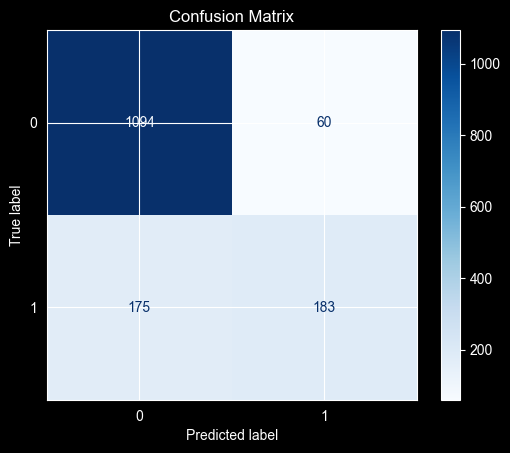

In [23]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Points to note - 2

¿Cuál es la tasa de verdaderos positivos? Habrá una pregunta sobre esto en la actividad que sigue.

## Características importantes

Recuerda que, para obtener las importancias de las características categóricas, debemos retroceder a través del pipeline de modelado para asociar las importancias con sus variables de entrada originales, no con las variables transformadas mediante one-hot encoding.

No necesitamos hacer esto para las características numéricas porque no modificamos sus nombres en ninguna etapa.

Recuerda que pasamos de características categóricas a características one-hot codificadas usando el transformador de columna llamado 'cat'.

Ahora obtengamos todas las importancias de características y asociémoslas con sus características transformadas.

Ejercicio 14. Extraer la importancia de las características

In [24]:
feature_importances = grid_search.best_estimator_['classifier'].feature_importances_

Ahora extraigamos la importancia de las características y represéntelas en un gráfico de barras.

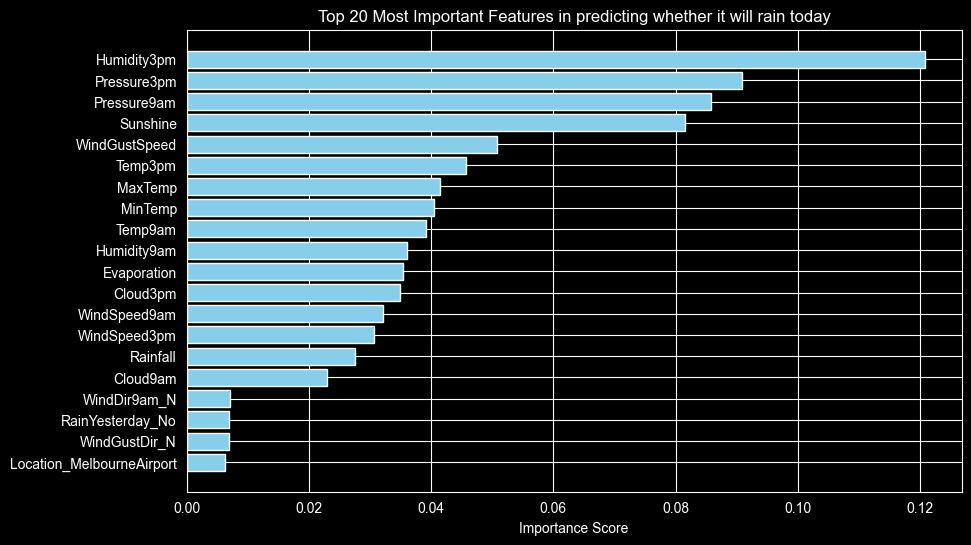

In [25]:
# Combine numeric and categorical feature names
feature_names = numeric_features + list(grid_search.best_estimator_['preprocessor']
                                        .named_transformers_['cat']
                                        .named_steps['onehot']
                                        .get_feature_names_out(categorical_features))

feature_importances = grid_search.best_estimator_['classifier'].feature_importances_

importance_df = pd.DataFrame({'Feature': feature_names,
                              'Importance': feature_importances
                             }).sort_values(by='Importance', ascending=False)

N = 20  # Change this number to display more or fewer features
top_features = importance_df.head(N)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.title(f'Top {N} Most Important Features in predicting whether it will rain today')
plt.xlabel('Importance Score')
plt.show()

Punto a destacar - 3

Identifica la característica más importante para predecir si lloverá según el gráfico de barras de importancia de las características. Habrá una pregunta sobre esto en la tarea que sigue.

## Prueba con otro modelo
## Algunas ideas

En la práctica, querrías probar diferentes modelos e incluso revisar el análisis de datos para mejorar el desempeño de tu modelo. Tal vez puedas crear mejores características, eliminar las irrelevantes o redundantes, proyectar tus datos en un espacio de características de menor dimensión, o imputar valores faltantes para poder usar más datos. También puedes probar un conjunto más amplio de parámetros para definir tu cuadrícula de búsqueda, o incluso generar nuevas características usando análisis de clústeres. ¡Incluso puedes incluir los hiperparámetros del algoritmo de clústeres en tu cuadrícula de búsqueda!

Con las poderosas clases Pipeline y GridSearchCV de Scikit-learn, esto es fácil de hacer en unos pocos pasos.

## Ejercicio 15. Actualiza la pipeline y la cuadrícula de parámetros

Actualicemos la pipeline y la cuadrícula de parámetros, y entrenemos un modelo de Regresión Logística para comparar el desempeño de ambos modelos. Necesitarás reemplazar el clasificador por LogisticRegression. Hemos proporcionado la cuadrícula de parámetros para ti.

In [26]:
## Write your response
# Replace RandomForestClassifier with LogisticRegression
pipeline.set_params(classifier=LogisticRegression(random_state=42))

# update the model's estimator to use the new pipeline
grid_search.estimator = pipeline

# Define a new grid with Logistic Regression parameters
param_grid = {
    'classifier__solver': ['liblinear'],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__class_weight': [None, 'balanced']
}

grid_search.param_grid = param_grid

# Fit the updated pipeline with LogisticRegression
grid_search.fit(X_train, y_train)

# Make predictions
y_pred = grid_search.predict(X_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=No

## Compara los resultados con tu modelo anterior

Muestra el informe de clasificación y la matriz de confusión para el nuevo modelo, y compara tus resultados con los del modelo anterior.

              precision    recall  f1-score   support

          No       0.86      0.93      0.89      1154
         Yes       0.68      0.51      0.58       358

    accuracy                           0.83      1512
   macro avg       0.77      0.72      0.74      1512
weighted avg       0.82      0.83      0.82      1512



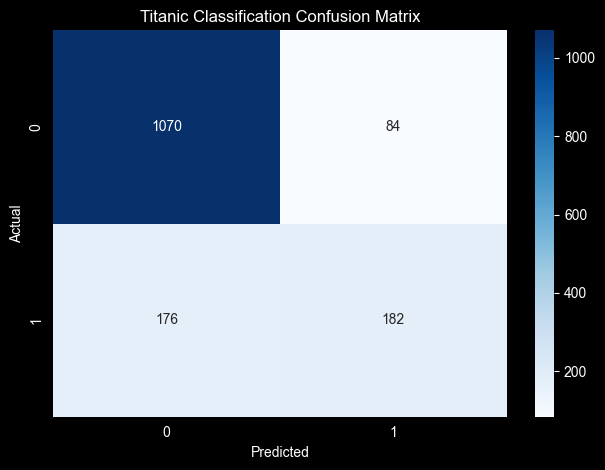

In [27]:
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Titanic Classification Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

Puntos a considerar - 4

Compara la exactitud y la tasa de verdaderos positivos de las predicciones de lluvia entre el modelo LogisticRegression y el modelo RandomForestClassifier.